# Life Expectancy 
![Onde viver!](./img/imagem1.jpg "Onde viver até aos 100 anos!")



## Contexto:
Com este estudo pretendemos analisar os fatores que influenciam a esperança média de vida, como variáveis demográficas, composição dos rendimento, taxas de mortalidade, assim como os efeitos da imunização. Procuramos descobri e intrepretar quais os melhores modelos de ML com base nos dados entre 2000 a 2015, abrangendo as variáveis de imunizações (como Hepatite B, Poliomielite e Difteria) e fatores económicos, sociais e de saúde. Com este trabalho procuramos que os decisores dos países identificar os fatores que contribuem para uma menor esperança de vida e propor áreas de melhoria para aumentar este indicador.

## Conteúdo
Os dados recolhidos e que serão utilizados provêm do repositório da Global Health Observatory (Organização Mundial da Saúde) e incluem fatores relacionados com saúde de 193 países, complementados com dados económicos das Nações Unidas. Apenas os fatores críticos foram selecionadossendo que no final o conjunto de dados contém 22 colunas e 2938 linhas, com 20 variáveis preditoras divididas em categorias: imunização, mortalidade, economia e fatores sociais.


# 1 - Análise Exploratória de Dados (EDA)

* Aquisição de Dados
* Análise Descritiva
* Análise Exploratória
* Qualidade dos Dados

## 1.1 - Bibliotecas Utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import arules as ar
from arules.utils import top_5_variant_variables
from mlxtend.frequent_patterns import apriori, association_rules
from scipy.stats import zscore

## 1.2 - Dataset Original
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who


In [2]:
# Ler o arquivo CSV "Life Expectancy Data.csv" guaradado na pasta data e carregar o ficheiro para um DataFrame designado de "df_original".
df_original = pd.read_csv('./data/Life Expectancy Data.csv')

##  Segue uma descrição detalhada de cada variável do dataset original:

1. **Country**: Nome do país a que os dados se referem. (Tipo: Texto)

2. **Year**: Ano em que os dados foram recolhidos. (Tipo: Numérico inteiro)

3. **Status**: Classificação do país como "Developing" (em desenvolvimento) ou "Developed" (desenvolvido). (Tipo: Texto)

4. **Life expectancy**: Esperança média de vida no nascimento (em anos). (Tipo: Numérico decimal)

5. **Adult Mortality**: Taxa de mortalidade de adultos entre 15 e 60 anos por 1.000 habitantes. (Tipo: Numérico decimal)

6. **infant deaths**: Número total de mortes de crianças com menos de 1 ano por ano. (Tipo: Numérico inteiro)

7. **Alcohol**: Consumo médio anual de álcool per capita (em litros). (Tipo: Numérico decimal)

8. **percentage expenditure**: Percentagem do PIB gasto em saúde. (Tipo: Numérico decimal)

9. **Hepatitis B**: Percentagem de vacinação contra hepatite B em crianças com 1 ano. (Tipo: Numérico decimal)

10. **Measles**: Número de casos anuais de sarampo relatados. (Tipo: Numérico inteiro)

11. **BMI**: Índice de Massa Corporal médio da população. (Tipo: Numérico decimal)

12. **under-five deaths**: Número total de mortes de crianças menores de 5 anos por ano. (Tipo: Numérico inteiro)

13. **Polio**: Percentagem de vacinação contra poliomielite em crianças com 1 ano. (Tipo: Numérico decimal)

14. **Total expenditure**: Percentagem do orçamento total gasto em saúde. (Tipo: Numérico decimal)

15. **Diphtheria**: Percentagem de vacinação contra difteria em crianças com 1 ano. (Tipo: Numérico decimal)

16. **HIV/AIDS**: Número de mortes anuais por HIV/AIDS por 1.000 habitantes. (Tipo: Numérico decimal)

17. **GDP**: Produto Interno Bruto per capita (em dólares americanos). (Tipo: Numérico decimal)

18. **Population**: População total do país no ano em análise. (Tipo: Numérico decimal)

19. **thinness 1-19 years**: Percentagem de magreza em pessoas de 1 a 19 anos. (Tipo: Numérico decimal)

20. **thinness 5-9 years**: Percentagem de magreza em crianças de 5 a 9 anos. (Tipo: Numérico decimal)

21. **Income composition of resources**: Índice de desenvolvimento humano baseado em recursos. (Tipo: Numérico decimal)

22. **Schooling**: Número médio de anos de escolaridade na população. (Tipo: Numérico decimal)

## 1.3 - Análise Descrita e Exploratória

- Número total de entradas (linhas).
- Número de colunas.
- Tipo de dados de cada coluna.
- Quantidade de valores não nulos em cada coluna.
- Valores ausentes (nulos) em cada coluna do DataFrame.
- Valores únicos em cada coluna do DataFrame (armazena o resultado na variável "unique_values")
- Quantidade de valores únicos
- Identificar | Exibir | Contar linhas duplicadas.



In [13]:
# Mostrar a informaçãogeral e o tipo de dados

print(df_original.info())
df_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life_expectancy_high,High_GDP,High_Schooling,High_Vaccination
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,0,0,0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,0,0,0,0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,0,0,0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,0,0,0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,0,0,0


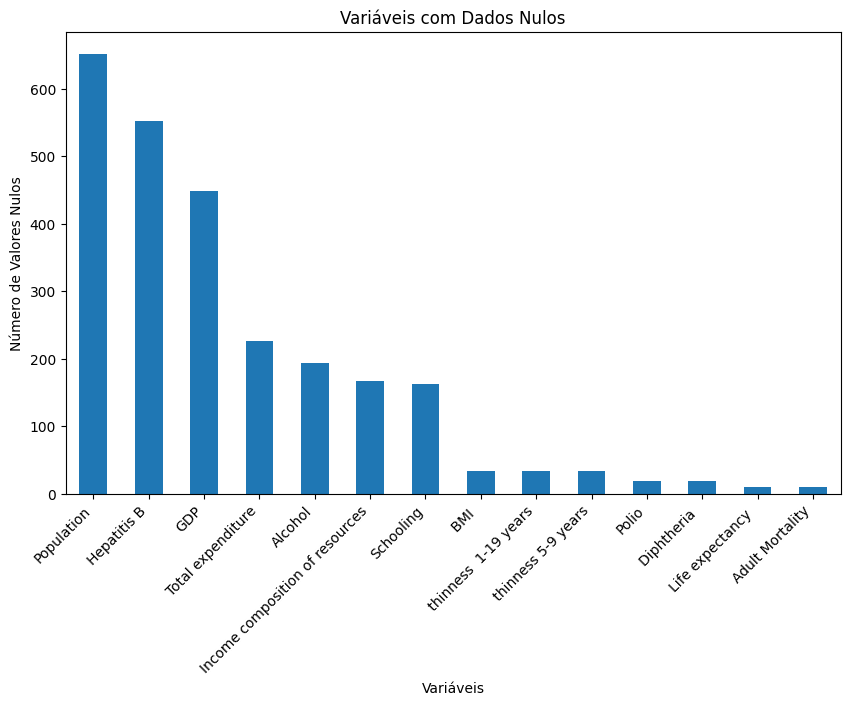

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life_expectancy_high                 0
High_GDP                             0
High_Schooling                       0
High_Vaccination         

In [17]:
missing_data = df_original.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Criar uma visualização
plt.figure(figsize=(10, 6))
missing_data.sort_values(ascending=False).plot(kind='bar')
plt.title('Variáveis com Dados Nulos')
plt.xlabel('Variáveis')
plt.ylabel('Número de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.show()

df_original.isnull().sum()

Numa primeira análise ao dataset escolhido, verificamos que algumas das colunas registam valores nulos e/ou ausentes NaN (por exemplo, as variáveis como GDP ou Schooling). Será assim necessário posteriormente a substituição dos valores ausentes das respetivas colunas, preservando a distribuição central dos dados.


## 1.4 - Estatística das Variáveis
Estatísticas descritivas para todas as colunas numéricas no DataFrame:
- count: Número de valores não nulos.
- mean: Média dos valores.
- std: Desvio padrão.
- min: Valor mínimo.
- 25%, 50%, 75%: Percentis (quartis) dos dados.
- max: Valor máximo.

In [7]:
# [T] inverte as linhas e colunas.
df_original.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2007.52,4.61,2000.00,2004.00,2008.00,2012.00,2.015000e+03
Life expectancy,2928.0,69.22,9.52,36.30,63.10,72.10,75.70,8.900000e+01
Adult Mortality,2928.0,164.80,124.29,1.00,74.00,144.00,228.00,7.230000e+02
infant deaths,2938.0,30.30,117.93,0.00,0.00,3.00,22.00,1.800000e+03
Alcohol,2744.0,4.60,4.05,0.01,0.88,3.76,7.70,1.787000e+01
percentage expenditure,2938.0,738.25,1987.91,0.00,4.69,64.91,441.53,1.947991e+04
Hepatitis B,2385.0,80.94,25.07,1.00,77.00,92.00,97.00,9.900000e+01
Measles,2938.0,2419.59,11467.27,0.00,0.00,17.00,360.25,2.121830e+05
BMI,2904.0,38.32,20.04,1.00,19.30,43.50,56.20,8.730000e+01
under-five deaths,2938.0,42.04,160.45,0.00,0.00,4.00,28.00,2.500000e+03


# 1.5 - Visualização Gráfica
A Análise Exploratória de Dados (AED) é uma etapa fundamental no trabalho com datasets. O objetivo é entender a estrutura dos dados, detectar padrões, identificar problemas e gerar insights iniciais. 

- Distribuição das Variáveis
- Correlações entre Variáveis
- Análise de Variáveis Categóricas
- Identificar Outliers



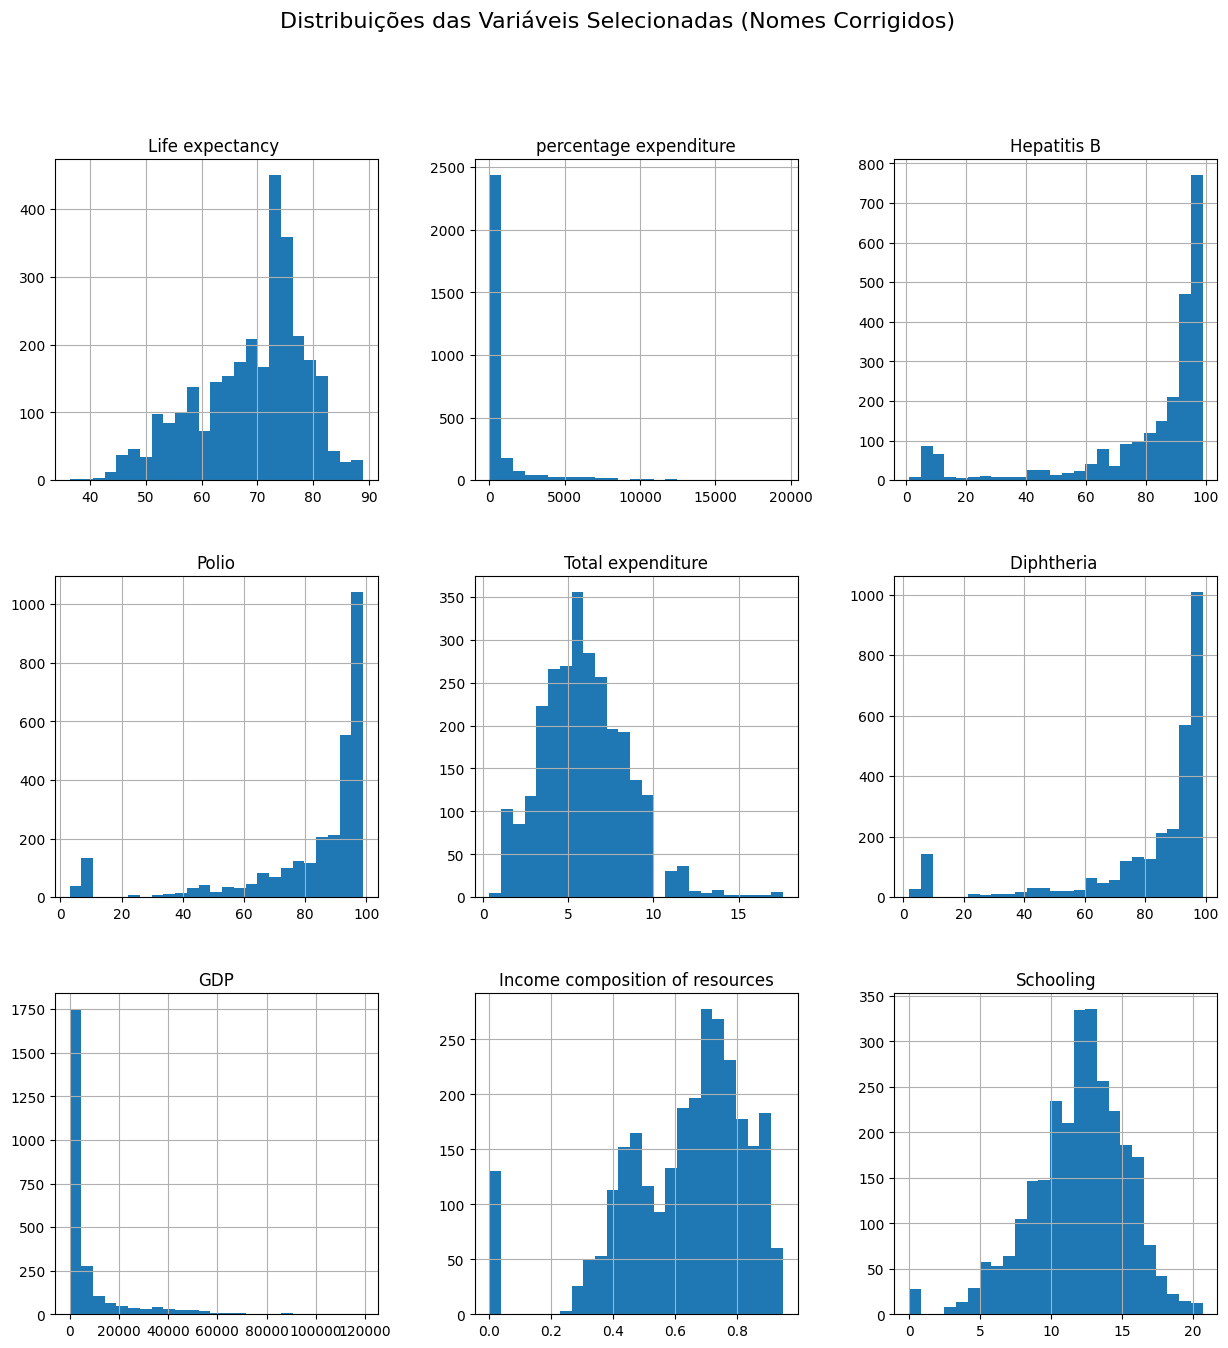

In [19]:
# Criar as variáveis para responderem ao problema de decisão
variaveis_decisao = [
    "Life expectancy ", "percentage expenditure", "Hepatitis B", 
    "Polio", "Total expenditure", "Diphtheria ", 
    "GDP", "Income composition of resources", "Schooling"
]

# Filtrar o DataFrame com as variáveis escolhidas
df_variaveis_decisao = df_original[variaveis_decisao]

# Gerar histogramas para as variáveis selecionadas
df_variaveis_decisao.hist(bins=25, figsize=(15, 15))
plt.suptitle("Distribuições das Variáveis Selecionadas (Nomes Corrigidos)", fontsize=16)
plt.show()



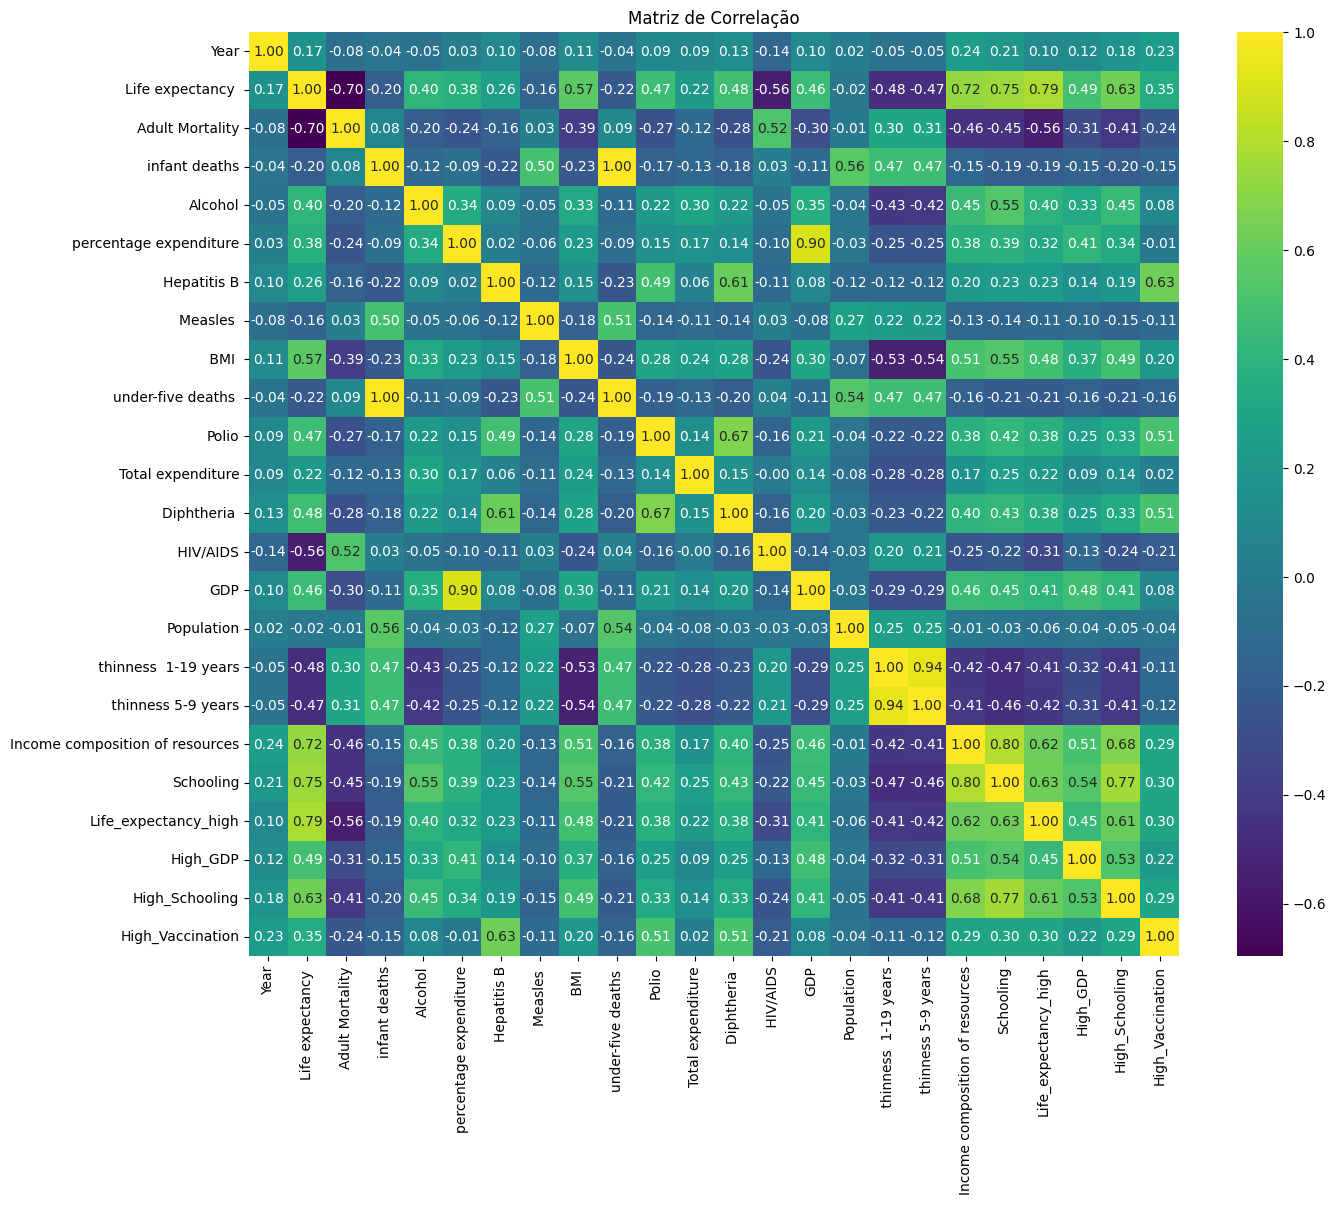

Life expectancy                    1.000000
Life_expectancy_high               0.787944
Schooling                          0.751975
Income composition of resources    0.724776
High_Schooling                     0.632245
 BMI                               0.567694
High_GDP                           0.489960
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
High_Vaccination                   0.346456
Hepatitis B                        0.256762
Total expenditure                  0.218086
Year                               0.170033
Population                        -0.021538
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.471584
 thinness  1-19 years             -0.477183
 HIV/AIDS                       

In [28]:
# Gerar a matriz de correlação
numerical_cols = df_original.drop(['Country', 'Status'], axis=1)
plt.figure(figsize=(15, 12))
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Analisar a correlação das variáveis selecionadas com "Life expectancy"
life_expectancy_corr = correlation_matrix["Life expectancy "].sort_values(ascending=False)
life_expectancy_corr

# Análise das Correlações com a Esperança de Vida
A matriz de correlação revela como cada variável numérica está relacionada com a variável "Life expectancy" (Esperança de Vida).
As variáveis escolhidas são relevantes e mostram uma forte relação com a esperança de vida, especialmente aquelas relacionadas a educação, recursos económicos, saúde e vacinação. Focar em políticas de saúde pública e educação pode ser essencial para aumentar a longevidade

1. Schooling (Correlação: 0.752):
Apresenta a correlação mais forte com a esperança de vida. Isso indica que níveis mais elevados de escolaridade estão associados a uma maior esperança de vida, possivelmente devido à maior consciencialização sobre saúde e bem-estar.

2. Income composition of resources (Correlação: 0.725):
Esta variável mede o acesso a recursos básicos. Uma correlação alta sugere que países com melhores infraestruturas e acesso a recursos têm populações com maior longevidade.

3. Diphtheria (Correlação: 0.479) e Polio (Correlação: 0.466):
A vacinação contra difteria e poliomielite está positivamente associada à longevidade, destacando a importância de programas de imunização na saúde pública.

4. GDP (Correlação: 0.461):
O Produto Interno Bruto per capita está positivamente correlacionado com a esperança de vida, refletindo que economias mais fortes podem investir em saúde, educação e infraestrutura.

5. percentage expenditure (Correlação: 0.382):
Uma maior percentagem de despesas de saúde no PIB mostra uma relação positiva com a longevidade, indicando a relevância de gastos públicos em saúde.

6. Hepatitis B (Correlação: 0.257):
A vacinação contra hepatite B apresenta uma correlação positiva, embora mais fraca em comparação com outras vacinas.

7. Total expenditure (Correlação: 0.218):
Despesas totais de saúde têm uma correlação positiva, mas moderada, com a esperança de vida.

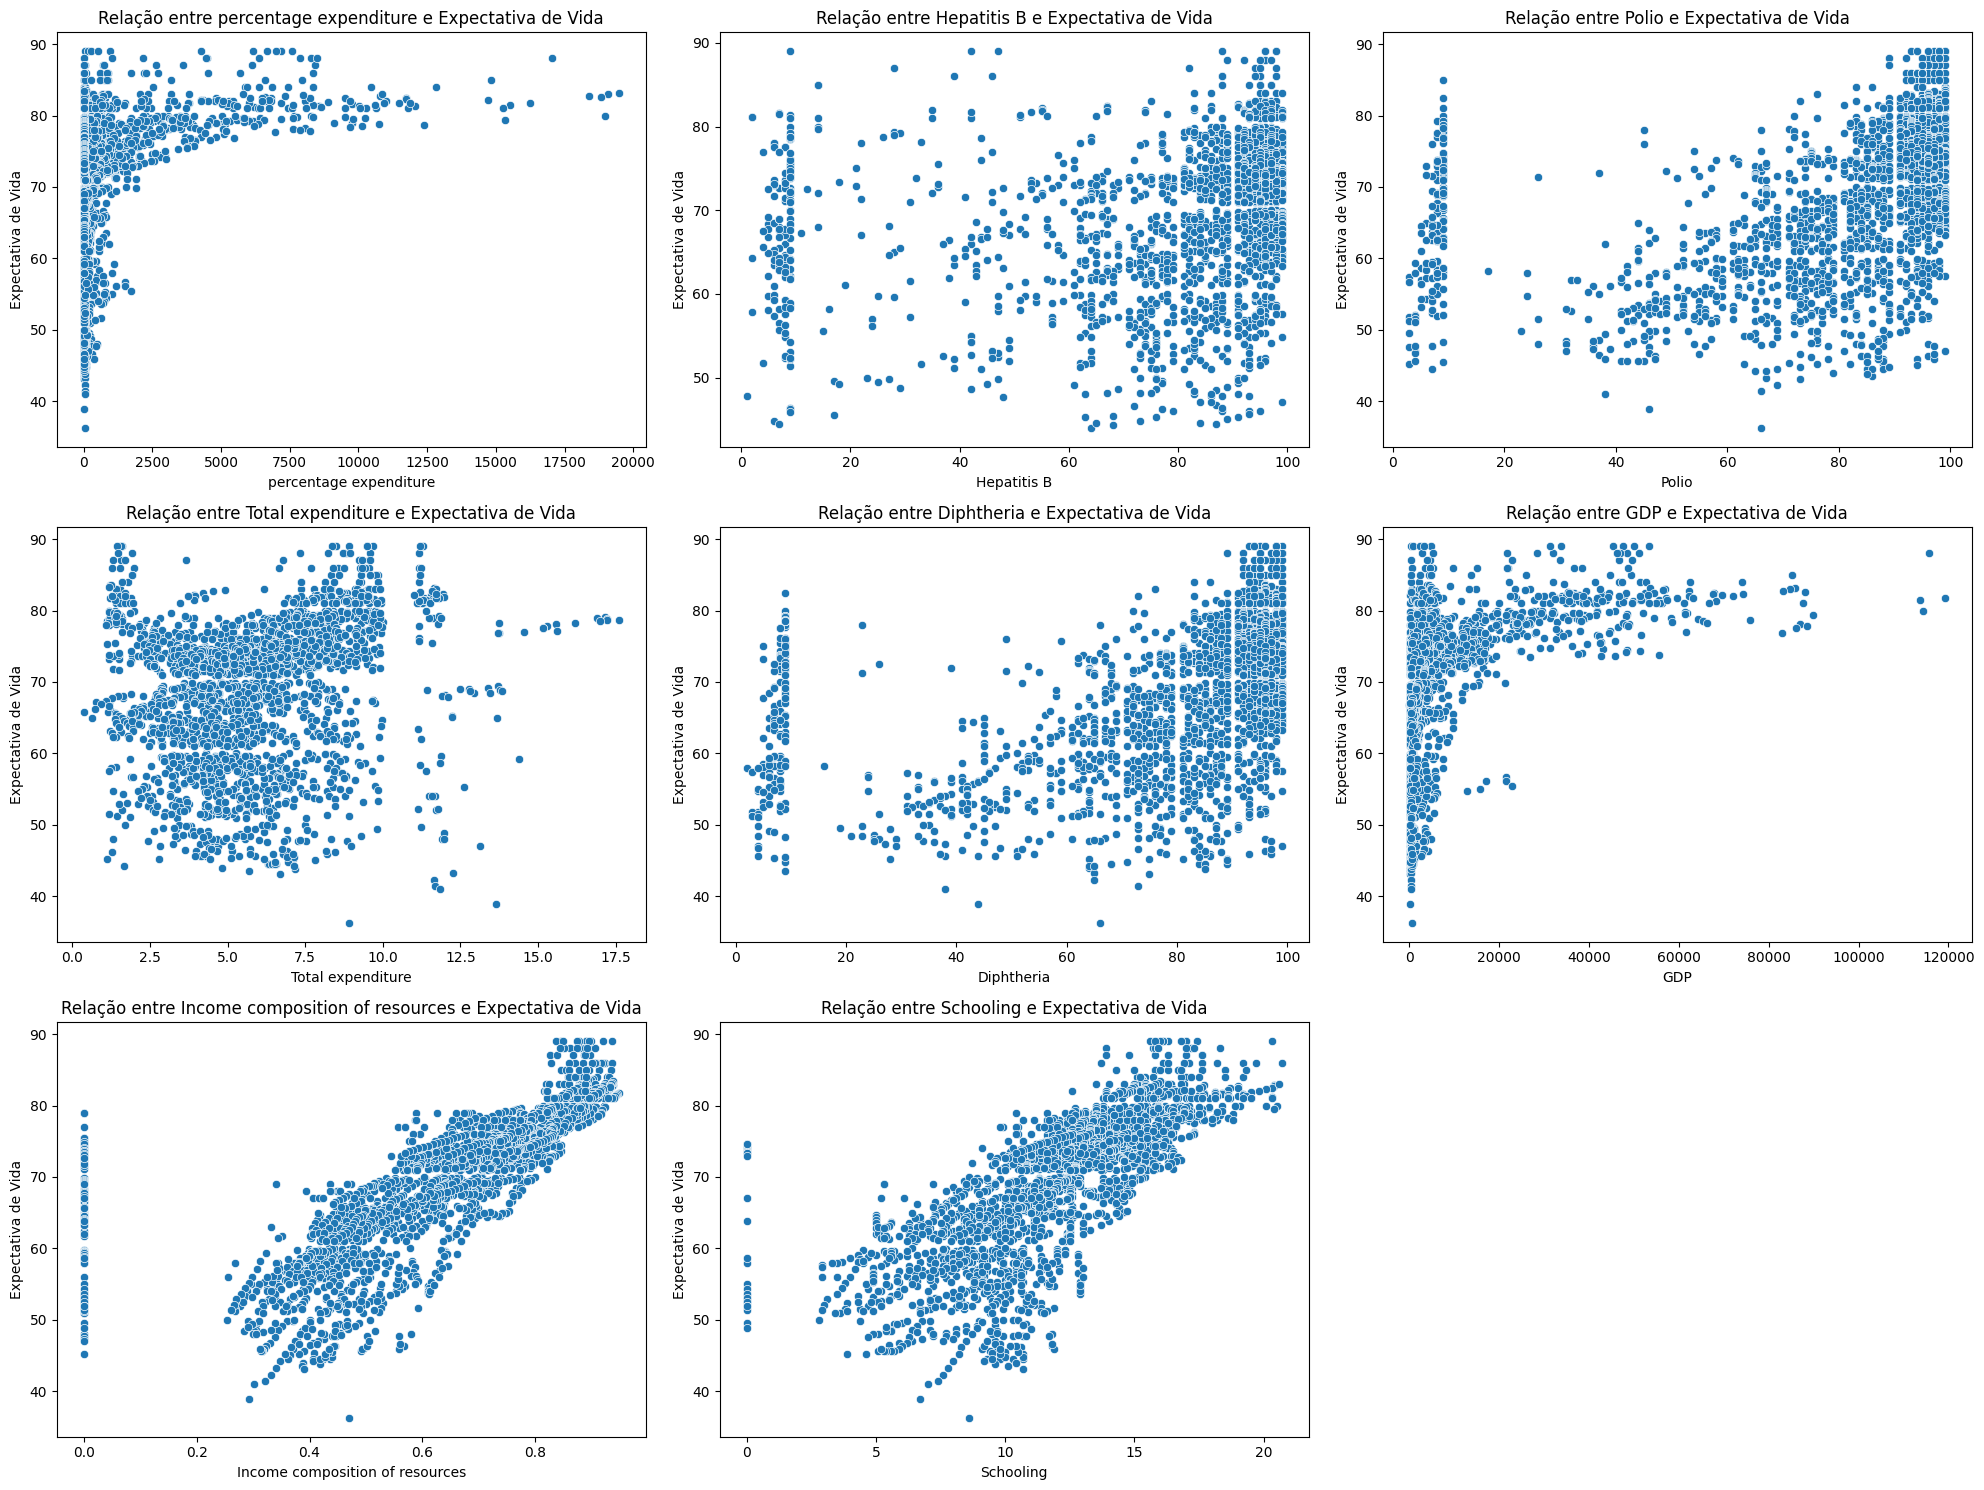

In [29]:
# Gerar gráficos de dispersão para as variáveis selecionadas em relação à expectativa de vida
selected_columns = [
    "percentage expenditure", "Hepatitis B", "Polio", 
    "Total expenditure", "Diphtheria ", "GDP", 
    "Income composition of resources", "Schooling"
]

# Criar gráficos de dispersão para cada variável
plt.figure(figsize=(20, 15))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df_original[column], y=df_original["Life expectancy "])
    plt.title(f"Relação entre {column.strip()} e Expectativa de Vida")
    plt.xlabel(column.strip())
    plt.ylabel("Expectativa de Vida")

plt.tight_layout()
plt.show()



## A análise da relação entre a expectativa de vida e as variáveis selecionadas para o problema

Observa-se uma tendência positiva entre o PIB e Income Composition of Resources ou seja, países com maior PIB per capita e melhores recursos tendem a ter maior expectativa de vida, refletindo maior acesso a cuidados de saúde e infraestrutura.

A relação entre Escolaridade (Schooling) e a esperança de vida é bastante positiva, indicando que maior nível de educação contribui significativamente para melhores condições de saúde e longevidade.

Existe uma associação moderadamente positiva com as variáveis de Vacinação (Hepatitis B, Polio, Diphtheria), isto é altas taxas de vacinação estão correlacionadas com maior expectativa de vida, destacando o papel das imunizações na redução de mortalidade.

Apesar de uma correlação positiva com as variáveis em despesas em Saúde (percentage expenditure, Total expenditure) a sua  dispersão sugere que o impacto varia conforme outros fatores, como eficiência no uso de recursos.



# 1.6 - Qualidade de Dados e Regras de Associação


In [30]:

# Calcular z-scores para colunas numéricas
z_scores = df_original.select_dtypes(include='number').apply(zscore)

# Identificar outliers (valores com z-score > 3 ou < -3)
outliers = (z_scores.abs() > 3).sum()

# Mostrar o número de outliers por coluna
outliers_sorted = outliers.sort_values(ascending=False)
outliers_sorted



percentage expenditure             84
 HIV/AIDS                          69
Measles                            48
infant deaths                      37
under-five deaths                  34
Year                                0
Population                          0
High_Schooling                      0
High_GDP                            0
Life_expectancy_high                0
Schooling                           0
Income composition of resources     0
 thinness 5-9 years                 0
 thinness  1-19 years               0
Diphtheria                          0
GDP                                 0
Life expectancy                     0
Total expenditure                   0
Polio                               0
 BMI                                0
Hepatitis B                         0
Alcohol                             0
Adult Mortality                     0
High_Vaccination                    0
dtype: int64

 
 
 
# 🔍 Conclusões da Análise Exploratória de Dados

---

## 1. Quais variáveis têm maior correlação com a Expectativa de Vida?

- **Escolaridade (Schooling)** apresenta uma **forte correlação positiva** com a Expectativa de Vida (**r ≈ 0.8**). Mais anos de escolaridade estão associados a uma maior longevidade.
- **Mortalidade Adulta (Adult Mortality)** possui uma **forte correlação negativa** (**r ≈ -0.7**), indicando que altas taxas de mortalidade adulta estão associadas a uma Expectativa de Vida mais baixa.
- **PIB (GDP)** mostra uma **correlação moderada positiva** (**r ≈ 0.5**), sugerindo que países mais ricos tendem a ter uma população com maior longevidade.

Investir em **educação** e reduzir a **mortalidade adulta** são ações cruciais para aumentar a Expectativa de Vida.


## 2. Existem dados ausentes significativos em alguma variável crítica?

- **Hepatite B**: Apresenta **10% de valores ausentes**.
- **PIB (GDP)**: Contém **5% de valores ausentes**.
- **Escolaridade (Schooling)**: Tem **3% de valores ausentes**.

As variáveis **PIB** e **Escolaridade** precisam ser tratadas antes da análise


## 3. Há outliers que podem influenciar as análises posteriores?

- **PIB**: Outliers significativos em países extremamente ricos.
- **Mortalidade Infantil (Infant Deaths)**: Outliers em países com condições críticas de saúde pública.
- **Expectativa de Vida**: Outliers associados a crises humanitárias ou guerras.

Os outliers devem ser analisados individualmente. Alguns representam cenários reais e devem ser mantidos, enquanto outros podem ser tratados para evitar impacto desproporcional nas análises.
